<a href="https://colab.research.google.com/github/FastSword88/Anime-mas-visto-en-2024/blob/main/Anime_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalamos las dependencias a usar.

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn

##Importamos librerias y dataset a usar.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import missingno as mn
import numpy as np
import re
import os

In [ ]:
anime_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Set/anime.csv')

#Ver datos de csv.

In [ ]:
anime_df

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


##Primero veremos cual es el numero de columnas y filas

In [ ]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [ ]:
#Aqui veremos el numero de filas.
print(f"Numero de filas: {len(anime_df)}")

Numero de filas: 17562


In [ ]:
#Aqui veremos el numero de columnas.
print(f"Numero de columnas: {len(anime_df.columns)}")

Numero de columnas: 35


###Aqui veremos de manera visual si hay casillas con datos perdidos para la limpieza.

<Axes: >

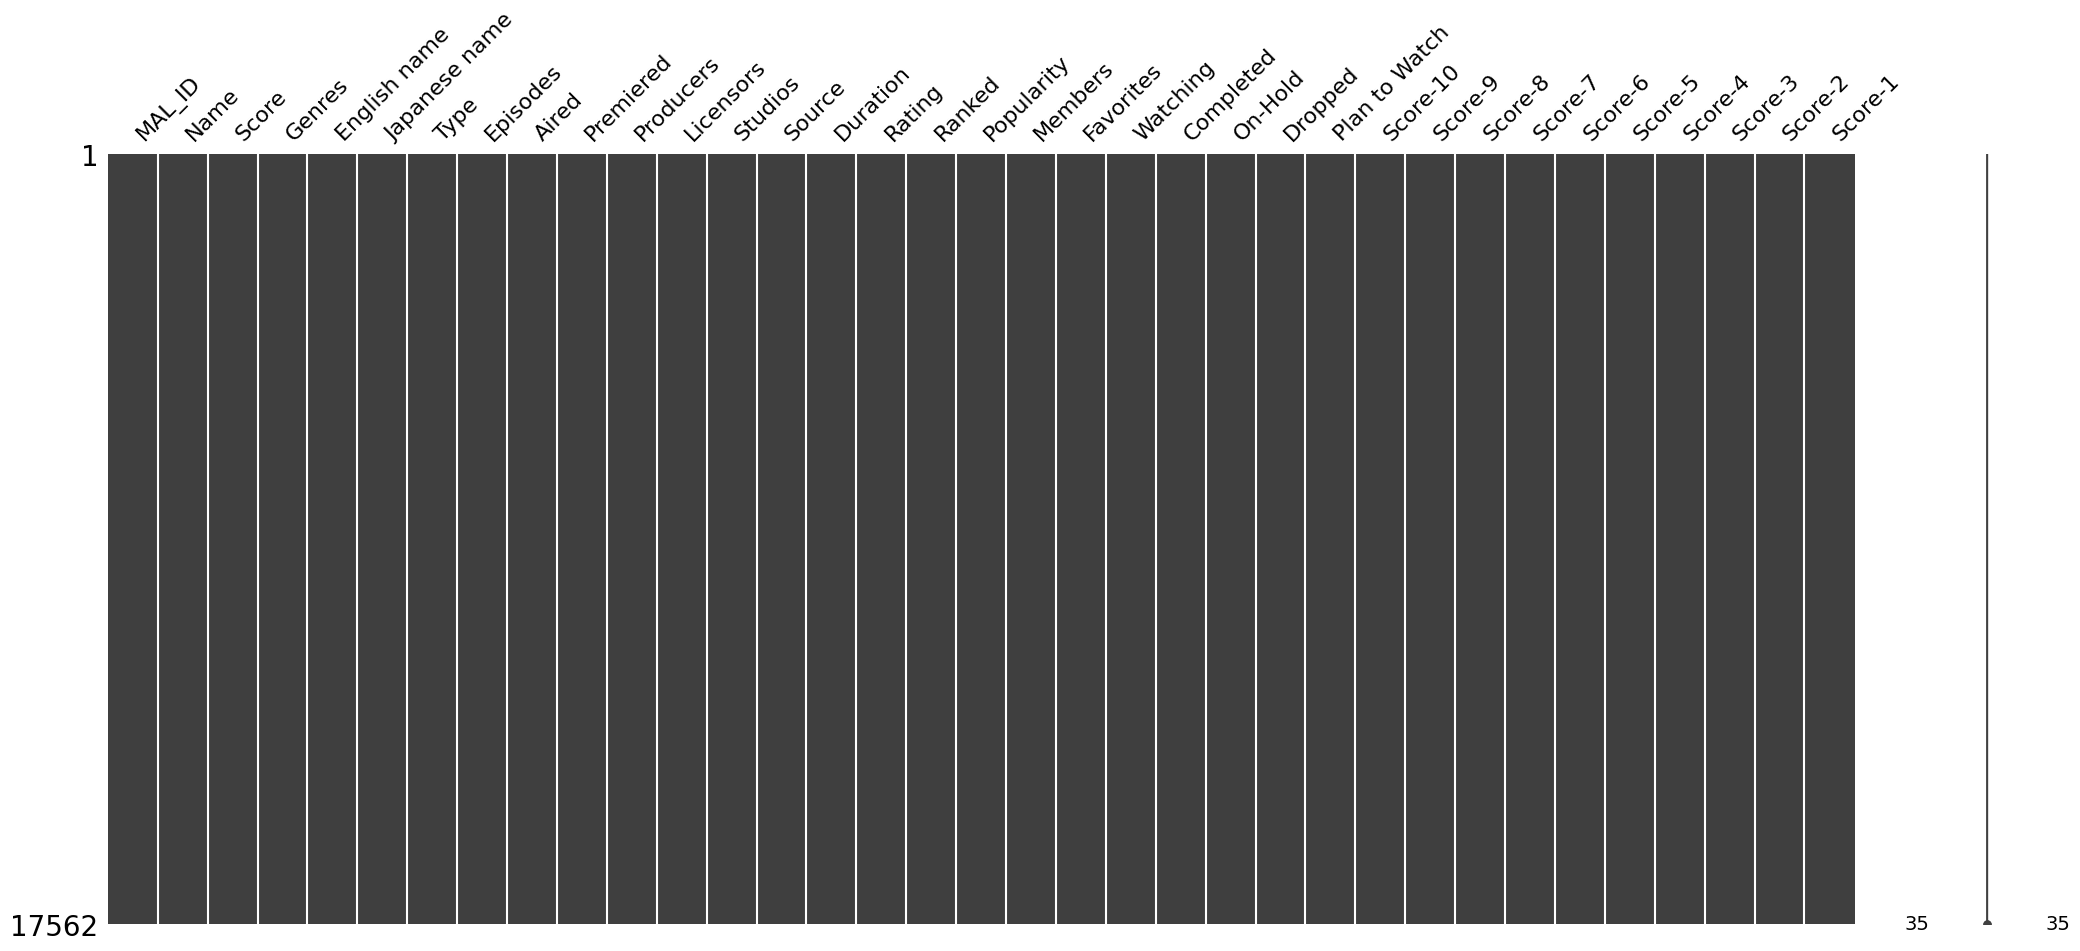

In [ ]:
mn.matrix(anime_df)

In [ ]:
#Ahora veremos de manera exacta los tipos de datos que tiene cada columna:
print("Columnas que solo tengan valores numericos:")
print(anime_df.select_dtypes(include=['int64', 'float64']).columns)
print("\nColumnas que solo tengan valores de texto:")
print(anime_df.select_dtypes(include=['object']).columns)

Columnas que solo tengan valores numericos:
Index(['MAL_ID', 'Popularity', 'Members', 'Favorites', 'Watching', 'Completed',
       'On-Hold', 'Dropped', 'Plan to Watch'],
      dtype='object')

Columnas que solo tengan valores de texto:
Index(['Name', 'Score', 'Genres', 'English name', 'Japanese name', 'Type',
       'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors', 'Studios',
       'Source', 'Duration', 'Rating', 'Ranked', 'Score-10', 'Score-9',
       'Score-8', 'Score-7', 'Score-6', 'Score-5', 'Score-4', 'Score-3',
       'Score-2', 'Score-1'],
      dtype='object')


#Iniciamos con la limpieza de datos.

##Primero veremos si hay columnas con valores faltantes.

In [ ]:
#Filtraremos las columnas que tengan al menos un valor faltante.
columnas_con_datos_faltantes = anime_df.columns[anime_df.isnull().any()]
print("Columnas con datos faltantes:")
print(columnas_con_datos_faltantes)

Columnas con datos faltantes:
Index([], dtype='object')


###El resultado aparenta que no hay ningun dato faltante pero necesitamos saber si hay cadenas vacias o celdas que tengan palabras como unknown


In [ ]:
print("\nValores únicos en las primeras columnas:")
for col in anime_df.columns[:5]:  # Revisa las primeras 5 columnas
    print(f"{col}: {anime_df[col].unique()[:10]}")  # Primeros 10 valores únicos



Valores únicos en las primeras columnas:
MAL_ID: [ 1  5  6  7  8 15 16 17 18 19]
Name: ['Cowboy Bebop' 'Cowboy Bebop: Tengoku no Tobira' 'Trigun'
 'Witch Hunter Robin' 'Bouken Ou Beet' 'Eyeshield 21'
 'Hachimitsu to Clover' 'Hungry Heart: Wild Striker'
 'Initial D Fourth Stage' 'Monster']
Score: ['8.78' '8.39' '8.24' '7.27' '6.98' '7.95' '8.06' '7.59' '8.15' '8.76']
Genres: ['Action, Adventure, Comedy, Drama, Sci-Fi, Space'
 'Action, Drama, Mystery, Sci-Fi, Space'
 'Action, Sci-Fi, Adventure, Comedy, Drama, Shounen'
 'Action, Mystery, Police, Supernatural, Drama, Magic'
 'Adventure, Fantasy, Shounen, Supernatural'
 'Action, Sports, Comedy, Shounen'
 'Comedy, Drama, Josei, Romance, Slice of Life'
 'Slice of Life, Comedy, Sports, Shounen'
 'Action, Cars, Sports, Drama, Seinen'
 'Drama, Horror, Mystery, Police, Psychological, Seinen, Thriller']
English name: ['Cowboy Bebop' 'Cowboy Bebop:The Movie' 'Trigun' 'Witch Hunter Robin'
 'Beet the Vandel Buster' 'Unknown' 'Honey and Clover' 'Mons

###En este caso si encontramos la palabra Unknown en la columna English name.

In [ ]:
# Buscar valores comunes que representan "desconocido"
valores_faltantes_comunes = ['Unknown', 'unknown', 'N/A', 'n/a', 'NA', 'na', 'None', 'null', 'NULL', '-', '?', '??']

print("\nBuscando valores especiales que podrían ser faltantes:")
for col in anime_df.select_dtypes(include=['object']).columns:
    for valor in valores_faltantes_comunes:
        count = (anime_df[col] == valor).sum()
        if count > 0:
            print(f"{col}: '{valor}' aparece {count} veces")


Buscando valores especiales que podrían ser faltantes:
Score: 'Unknown' aparece 5141 veces
Genres: 'Unknown' aparece 63 veces
English name: 'Unknown' aparece 10565 veces
Japanese name: 'Unknown' aparece 48 veces
Type: 'Unknown' aparece 37 veces
Episodes: 'Unknown' aparece 516 veces
Aired: 'Unknown' aparece 309 veces
Premiered: 'Unknown' aparece 12817 veces
Producers: 'Unknown' aparece 7794 veces
Licensors: 'Unknown' aparece 13616 veces
Studios: 'Unknown' aparece 7079 veces
Source: 'Unknown' aparece 3567 veces
Duration: 'Unknown' aparece 555 veces
Rating: 'Unknown' aparece 688 veces
Ranked: 'Unknown' aparece 1762 veces
Score-10: 'Unknown' aparece 437 veces
Score-9: 'Unknown' aparece 3167 veces
Score-8: 'Unknown' aparece 1371 veces
Score-7: 'Unknown' aparece 503 veces
Score-6: 'Unknown' aparece 511 veces
Score-5: 'Unknown' aparece 584 veces
Score-4: 'Unknown' aparece 977 veces
Score-3: 'Unknown' aparece 1307 veces
Score-2: 'Unknown' aparece 1597 veces
Score-1: 'Unknown' aparece 459 vece

###Debido al contexto de los datos en este caso se haran cambios de datos en diferentes lugares donde ocuparemos hacer cambio de datos.

#Ahora haremos cambios de tipo de dato.

In [ ]:
anime_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [ ]:
#En este caso cambiaremos score a float64 ya que lo usaremos para obtener datos estadisticos pero primero hay que tratar los datos.
anime_df['Score'] = anime_df['Score'].replace('Unknown', np.nan)


In [ ]:
anime_df['Score'] = anime_df['Score'].astype(float)

###Ahora iremos con los Episodios los cuales combiaremos a enteros sustituyendo Unknown por nan ya que no sabemos si son animes que siguen en emision o estan en pausa.

In [ ]:
anime_df['Episodes'] = anime_df['Episodes'].replace(pd.NA, np.nan)

In [ ]:
anime_df['Score'] = anime_df['Score'].astype(float)

In [ ]:
anime_df['Episodes'] = anime_df['Episodes'].astype(float)

ValueError: could not convert string to float: 'Unknown'

###Ahora necesitamos tener un valor numerico en duration por lo que crearemos una nueva columna donde la duracion sera numerica, esto para poder hacver correlaciones despues.

In [ ]:
unknown_count = (anime_df['Duration'] == 'Unknown').sum()
print(f"Encontrados {unknown_count} valores 'Unknown' en Duration")


Encontrados 555 valores 'Unknown' en Duration


In [ ]:
anime_df['Duration'] = anime_df['Duration'].replace('Unknown', np.nan)

In [ ]:
anime_df[['Name', 'Duration']]


,Name,Duration
0,Cowboy Bebop,24 min. per ep.
1,Cowboy Bebop: Tengoku no Tobira,1 hr. 55 min.
2,Trigun,24 min. per ep.
3,Witch Hunter Robin,25 min. per ep.
4,Bouken Ou Beet,23 min. per ep.
...,...,...
17557,Daomu Biji Zhi Qinling Shen Shu,NaN
17558,Mieruko-chan,NaN
17559,Higurashi no Naku Koro ni Sotsu,NaN
17560,Yama no Susume: Next Summit,NaN


In [ ]:
def simple_convert(duration):
    if pd.isna(duration):
        return np.nan

    s = str(duration)

    # Patrón 1: "X min. per ep."
    if "min. per ep." in s:
        try:
            return int(s.split()[0])
        except:
            return np.nan

    # Patrón 2: "X hr. Y min."
    elif "hr." in s and "min." in s:
        try:
            parts = s.split()
            hours = int(parts[0])
            minutes = int(parts[2])
            return hours * 60 + minutes
        except:
            return np.nan

    # Patrón 3: Solo "X min."
    elif "min." in s:
        try:
            return int(s.split()[0])
        except:
            return np.nan

    return np.nan

# Aplicar
anime_df['Duration_min'] = anime_df['Duration'].apply(simple_convert)


In [ ]:
# Aplicar la función para crear la nueva columna
anime_df['Duration_min'] = anime_df['Duration'].apply(convert_to_minutes)

NameError: name 'convert_to_minutes' is not defined

In [ ]:
anime_df[['Name', 'Duration', 'Duration_min']]

,Name,Duration,Duration_min
0,Cowboy Bebop,24 min. per ep.,24.0
1,Cowboy Bebop: Tengoku no Tobira,1 hr. 55 min.,115.0
2,Trigun,24 min. per ep.,24.0
3,Witch Hunter Robin,25 min. per ep.,25.0
4,Bouken Ou Beet,23 min. per ep.,23.0
...,...,...,...
17557,Daomu Biji Zhi Qinling Shen Shu,NaN,NaN
17558,Mieruko-chan,NaN,NaN
17559,Higurashi no Naku Koro ni Sotsu,NaN,NaN
17560,Yama no Susume: Next Summit,NaN,NaN


###Ahora necesitamos dividir en 2 Aired, en Start_Date y Finish_Date en formato Datetime

In [ ]:
anime_df[['Name','Aired']]

,Name,Aired
0,Cowboy Bebop,"Apr 3, 1998 to Apr 24, 1999"
1,Cowboy Bebop: Tengoku no Tobira,"Sep 1, 2001"
2,Trigun,"Apr 1, 1998 to Sep 30, 1998"
3,Witch Hunter Robin,"Jul 2, 2002 to Dec 24, 2002"
4,Bouken Ou Beet,"Sep 30, 2004 to Sep 29, 2005"
...,...,...
17557,Daomu Biji Zhi Qinling Shen Shu,"Apr 4, 2021 to ?"
17558,Mieruko-chan,2021 to ?
17559,Higurashi no Naku Koro ni Sotsu,"Jul, 2021 to ?"
17560,Yama no Susume: Next Summit,Unknown


In [ ]:
#Vamos a dividir primero en dos columnas.
def split_aired_dates(aired_str):
    """
    Divide la columna Aired en Start_Date y End_Date
    """
    if pd.isna(aired_str):
        return pd.Series([np.nan, np.nan])

    aired_str = str(aired_str).strip()

    # Caso 1: "Unknown"
    if aired_str.lower() == 'unknown':
        return pd.Series([np.nan, np.nan])

    # Caso 2: Rango con "to"
    if 'to' in aired_str:
        parts = aired_str.split('to')

        # Start date
        start_str = parts[0].strip()
        # End date
        end_str = parts[1].strip() if len(parts) > 1 else ''

        # Manejar "?" en end date
        if end_str == '?' or end_str == '':
            end_date = np.nan
        else:
            # Formatear end date
            end_date = format_date(end_str)

        start_date = format_date(start_str) if start_str else np.nan
        return pd.Series([start_date, end_date])

    # Caso 3: Fecha única
    else:
        # Si es solo un año "2021", agregar Jan 1
        if re.match(r'^\d{4}$', aired_str.strip()):
            start_date = f"Jan 1, {aired_str}"
            return pd.Series([start_date, start_date])

        # Si es mes y año "Jul, 2021"
        elif re.match(r'^[A-Za-z]{3}, \d{4}$', aired_str.strip()):
            start_date = aired_str
            # Convertir a fecha completa aproximada
            end_date = f"Dec 31, {aired_str.split(', ')[1]}"
            return pd.Series([start_date, end_date])

        # Fecha completa
        else:
            start_date = format_date(aired_str)
            return pd.Series([start_date, start_date])

def format_date(date_str):
    """
    Formatea la fecha a un formato consistente
    """
    if pd.isna(date_str) or date_str == '':
        return np.nan

    date_str = str(date_str).strip()

    # Ya está en buen formato
    if re.match(r'^[A-Za-z]{3} \d{1,2}, \d{4}$', date_str):
        return date_str
    # Formato "Apr, 2021" o "Jul, 2021"
    elif re.match(r'^[A-Za-z]{3}, \d{4}$', date_str):
        # Convertir a "Apr 1, 2021" (primer día del mes)
        month, year = date_str.split(', ')
        return f"{month} 1, {year}"
    # Solo año
    elif re.match(r'^\d{4}$', date_str):
        return f"Jan 1, {date_str}"
    else:
        return date_str

# Aplicar la función
anime_df[['Start_Date', 'End_Date']] = anime_df['Aired'].apply(split_aired_dates)



In [ ]:
anime_df[['Name','Aired','Start_Date', 'End_Date']]

,Name,Aired,Start_Date,End_Date
0,Cowboy Bebop,"Apr 3, 1998 to Apr 24, 1999","Apr 3, 1998","Apr 24, 1999"
1,Cowboy Bebop: Tengoku no Tobira,"Sep 1, 2001","Sep 1, 2001","Sep 1, 2001"
2,Trigun,"Apr 1, 1998 to Sep 30, 1998","Apr 1, 1998","Sep 30, 1998"
3,Witch Hunter Robin,"Jul 2, 2002 to Dec 24, 2002","Jul 2, 2002","Dec 24, 2002"
4,Bouken Ou Beet,"Sep 30, 2004 to Sep 29, 2005","Sep 30, 2004","Sep 29, 2005"
...,...,...,...,...
17557,Daomu Biji Zhi Qinling Shen Shu,"Apr 4, 2021 to ?","Apr 4, 2021",NaN
17558,Mieruko-chan,2021 to ?,"Jan 1, 2021",NaN
17559,Higurashi no Naku Koro ni Sotsu,"Jul, 2021 to ?","Jul 1, 2021",NaN
17560,Yama no Susume: Next Summit,Unknown,NaN,NaN


In [ ]:
def robust_date_parser(date_str):
    """
    Convierte múltiples formatos de fecha a datetime.
    """
    if pd.isna(date_str):
        return pd.NaT

    date_str = str(date_str).strip()

    # Lista de formatos a probar
    formats_to_try = [
        '%b %d, %Y',      # Apr 3, 1998
        '%B %d, %Y',      # April 3, 1998
        '%b %Y',          # Apr 1998 (asumir día 1)
        '%B %Y',          # April 1998 (asumir día 1)
        '%Y',             # 1998 (asumir Jan 1)
        '%Y-%m-%d',       # 1998-04-03
        '%d/%m/%Y',       # 03/04/1998
        '%m/%d/%Y',       # 04/03/1998
    ]

    for fmt in formats_to_try:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except:
            continue

    # Si ningún formato funciona, intentar parse automático
    try:
        return pd.to_datetime(date_str, errors='coerce')
    except:
        return pd.NaT

# Aplicar versión robusta
anime_df['Start_Date_dt'] = anime_df['Start_Date'].apply(robust_date_parser)
anime_df['End_Date_dt'] = anime_df['End_Date'].apply(robust_date_parser)

In [ ]:
anime_df[['Name','Aired','Start_Date', 'End_Date']]

,Name,Aired,Start_Date,End_Date
0,Cowboy Bebop,"Apr 3, 1998 to Apr 24, 1999","Apr 3, 1998","Apr 24, 1999"
1,Cowboy Bebop: Tengoku no Tobira,"Sep 1, 2001","Sep 1, 2001","Sep 1, 2001"
2,Trigun,"Apr 1, 1998 to Sep 30, 1998","Apr 1, 1998","Sep 30, 1998"
3,Witch Hunter Robin,"Jul 2, 2002 to Dec 24, 2002","Jul 2, 2002","Dec 24, 2002"
4,Bouken Ou Beet,"Sep 30, 2004 to Sep 29, 2005","Sep 30, 2004","Sep 29, 2005"
...,...,...,...,...
17557,Daomu Biji Zhi Qinling Shen Shu,"Apr 4, 2021 to ?","Apr 4, 2021",NaN
17558,Mieruko-chan,2021 to ?,"Jan 1, 2021",NaN
17559,Higurashi no Naku Koro ni Sotsu,"Jul, 2021 to ?","Jul 1, 2021",NaN
17560,Yama no Susume: Next Summit,Unknown,NaN,NaN


In [ ]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MAL_ID         17562 non-null  int64         
 1   Name           17562 non-null  object        
 2   Score          12421 non-null  float64       
 3   Genres         17562 non-null  object        
 4   English name   17562 non-null  object        
 5   Japanese name  17562 non-null  object        
 6   Type           17562 non-null  object        
 7   Episodes       17562 non-null  object        
 8   Aired          17562 non-null  object        
 9   Premiered      17562 non-null  object        
 10  Producers      17562 non-null  object        
 11  Licensors      17562 non-null  object        
 12  Studios        17562 non-null  object        
 13  Source         17562 non-null  object        
 14  Duration       17007 non-null  object        
 15  Rating         1756

In [ ]:
anime_df[['Name', 'Dropped']]

,Name,Dropped
0,Cowboy Bebop,26678
1,Cowboy Bebop: Tengoku no Tobira,770
2,Trigun,13925
3,Witch Hunter Robin,5378
4,Bouken Ou Beet,1108
...,...,...
17557,Daomu Biji Zhi Qinling Shen Shu,0
17558,Mieruko-chan,0
17559,Higurashi no Naku Koro ni Sotsu,0
17560,Yama no Susume: Next Summit,1


In [ ]:
anime_df['Dropped'] = anime_df['Dropped'].astype(int)

#Creamos una copia la cual manipularemos para solo tener los animes que hayan salido en 2021

In [ ]:
anime_df_clean = anime_df.copy(deep=True)

In [ ]:
anime_df_clean

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-5,Score-4,Score-3,Score-2,Score-1,Duration_min,Start_Date,End_Date,Start_Date_dt,End_Date_dt
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,8904.0,3184.0,1357.0,741.0,1580.0,24.0,"Apr 3, 1998","Apr 24, 1999",1998-04-03,1999-04-24
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,1877.0,577.0,221.0,109.0,379.0,115.0,"Sep 1, 2001","Sep 1, 2001",2001-09-01,2001-09-01
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,5838.0,1965.0,664.0,316.0,533.0,24.0,"Apr 1, 1998","Sep 30, 1998",1998-04-01,1998-09-30
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2920.0,1083.0,353.0,164.0,131.0,25.0,"Jul 2, 2002","Dec 24, 2002",2002-07-02,2002-12-24
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,634.0,265.0,83.0,50.0,27.0,23.0,"Sep 30, 2004","Sep 29, 2005",2004-09-30,2005-09-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,NaN,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,"Apr 4, 2021",NaN,2021-04-04,NaT
17558,48483,Mieruko-chan,NaN,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,"Jan 1, 2021",NaN,2021-01-01,NaT
17559,48488,Higurashi no Naku Koro ni Sotsu,NaN,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,"Jul 1, 2021",NaN,2021-07-01,NaT
17560,48491,Yama no Susume: Next Summit,NaN,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaT,NaT


In [ ]:
anime_2020 = anime_df_clean[
    anime_df_clean['Start_Date_dt'].dt.year == 2020
].copy().reset_index(drop=True)

print(f"Animes de 2020: {len(anime_2020)}")
print(f"Dataset filtrado. Nuevo shape: {anime_2020.shape}")

Animes de 2020: 603
Dataset filtrado. Nuevo shape: (603, 40)


In [ ]:
anime_2020

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-5,Score-4,Score-3,Score-2,Score-1,Duration_min,Start_Date,End_Date,Start_Date_dt,End_Date_dt
0,33050,Fate/stay night Movie: Heaven's Feel - III. Sp...,8.79,"Action, Supernatural, Magic, Fantasy",Fate/stay night:Heaven's Feel - III. Spring Song,劇場版「Fate/stay night [Heaven's Feel] III.spring...,Movie,1,"Aug 15, 2020",Unknown,...,189.0,78.0,43.0,61.0,154.0,122.0,"Aug 15, 2020","Aug 15, 2020",2020-08-15,2020-08-15
1,35252,Hatena☆Illusion,5.37,"Comedy, Supernatural, Romance, Ecchi",Hatena Illusion,はてな☆イリュージョン,TV,12,"Jan 9, 2020 to Jun 4, 2020",Winter 2020,...,2356.0,1694.0,839.0,472.0,315.0,24.0,"Jan 9, 2020","Jun 4, 2020",2020-01-09,2020-06-04
2,35609,Entotsu Machi no Poupelle,NaN,"Adventure, Magic, Fantasy",Poupelle of Chimney Town,えんとつ町のプペル,Movie,1,"Dec 25, 2020",Unknown,...,1.0,2.0,1.0,1.0,3.0,NaN,"Dec 25, 2020","Dec 25, 2020",2020-12-25,2020-12-25
3,35960,Kud Wafter,7.10,"Comedy, Romance, School",Unknown,クドわふたー,Movie,1,"Nov 28, 2020",Unknown,...,74.0,31.0,15.0,8.0,13.0,50.0,"Nov 28, 2020","Nov 28, 2020",2020-11-28,2020-11-28
4,36862,Made in Abyss Movie 3: Fukaki Tamashii no Reimei,8.74,"Sci-Fi, Adventure, Mystery, Drama, Fantasy",Unknown,劇場版メイドインアビス 深き魂の黎明,Movie,1,"Jan 17, 2020",Unknown,...,486.0,237.0,108.0,70.0,166.0,105.0,"Jan 17, 2020","Jan 17, 2020",2020-01-17,2020-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,45599,Xue Ying Ling Zhu 2nd Season,NaN,"Action, Adventure, Fantasy, Historical, Martia...",Unknown,雪鹰领主 第二季,ONA,22,"Dec 31, 2020 to ?",Unknown,...,2.0,Unknown,1.0,1.0,1.0,NaN,"Dec 31, 2020",NaN,2020-12-31,NaT
599,45600,Chang An Huan Jie,NaN,Fantasy,Unknown,长安幻街,ONA,40,"Dec 31, 2020 to ?",Unknown,...,5.0,1.0,1.0,2.0,3.0,14.0,"Dec 31, 2020",NaN,2020-12-31,NaT
600,45611,Tadaima! Chibi Godzilla Season 2,NaN,"Slice of Life, Fantasy",Unknown,ただいま！ちびゴジラ シーズン２,ONA,13,"Dec 2, 2020 to Feb 24, 2021",Unknown,...,1.0,1.0,1.0,Unknown,Unknown,NaN,"Dec 2, 2020","Feb 24, 2021",2020-12-02,2021-02-24
601,45612,Shu Ling Ji 2nd Season,NaN,Martial Arts,Unknown,书灵记 第二季,ONA,40,"Oct 28, 2020 to ?",Unknown,...,Unknown,1.0,Unknown,Unknown,2.0,11.0,"Oct 28, 2020",NaN,2020-10-28,NaT


In [ ]:
anime_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MAL_ID         603 non-null    int64         
 1   Name           603 non-null    object        
 2   Score          423 non-null    float64       
 3   Genres         603 non-null    object        
 4   English name   603 non-null    object        
 5   Japanese name  603 non-null    object        
 6   Type           603 non-null    object        
 7   Episodes       603 non-null    object        
 8   Aired          603 non-null    object        
 9   Premiered      603 non-null    object        
 10  Producers      603 non-null    object        
 11  Licensors      603 non-null    object        
 12  Studios        603 non-null    object        
 13  Source         603 non-null    object        
 14  Duration       562 non-null    object        
 15  Rating         603 non-

In [ ]:
# Columnas Score del 1 al 10
score_cols = ['Score-1', 'Score-2', 'Score-3', 'Score-4', 'Score-5',
              'Score-6', 'Score-7', 'Score-8', 'Score-9', 'Score-10']

# Reemplazar 'Unknown' por NaN y convertir a float
for col in score_cols:
    anime_2020[col] = anime_2020[col].replace('Unknown', np.nan).astype(float)

print("Conversión completada. Verificación:")
print(anime_2020[score_cols].dtypes)
print(f"\nValores nulos por columna:")
for col in score_cols:
    null_count = anime_2020[col].isna().sum()
    print(f"{col}: {null_count} nulos")

Conversión completada. Verificación:
Score-1     float64
Score-2     float64
Score-3     float64
Score-4     float64
Score-5     float64
Score-6     float64
Score-7     float64
Score-8     float64
Score-9     float64
Score-10    float64
dtype: object

Valores nulos por columna:
Score-1: 5 nulos
Score-2: 49 nulos
Score-3: 54 nulos
Score-4: 32 nulos
Score-5: 21 nulos
Score-6: 5 nulos
Score-7: 20 nulos
Score-8: 50 nulos
Score-9: 81 nulos
Score-10: 23 nulos


In [ ]:

folder_path = '/content/drive/MyDrive/Colab Notebooks/Cuadernos'
os.makedirs(folder_path, exist_ok=True)

# Guardar archivo
file_path = os.path.join(folder_path, 'anime_2020.csv')
anime_2020.to_csv(file_path, index=False)
print(f"✅ Archivo guardado en: {file_path}")

✅ Archivo guardado en: /content/drive/MyDrive/Colab Notebooks/Cuadernos/anime_2020.csv
